# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [19]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [23]:
# Load the dataset
crops_df = pd.read_csv("soil_measures.csv")

# This model uses all features for the prediction of crop choice. This is the non-scaled data. 

# Mix of crops, 2200 lines of data. 
print(crops_df.head())
print(crops_df.tail())

# Number of missing values in df.
print(crops_df.isna().sum().sort_values()) # No missing values

# Extract feature data and target into X and Y
X = crops_df.drop("crop", axis = 1).values
y = crops_df["crop"].values

# Important to scale data before using features. 
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

# Split the data for training and test & fitting/prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 12)
logreg = LogisticRegression(solver = "lbfgs", penalty = "l2", max_iter = 500)
logreg.fit(X_train, y_train)

# Check for class imbalance
crop_dict = {}
for crop in y_train:
    if crop in crop_dict:
        crop_dict[crop] += 1
    else:
        crop_dict[crop] = 1
print(crop_dict)

# Confusion matrix and classification report. 
y_pred = logreg.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Confusion matrix: \n {confusion_mat}" )
print("---------------------------------------------")
print(f"Classification Report: \n {class_report}")


print("Non-scaled feature data score:", logreg.score(X_test, y_test))

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
        N   P   K        ph    crop
2195  107  34  32  6.780064  coffee
2196   99  15  27  6.086922  coffee
2197  118  33  30  6.362608  coffee
2198  117  32  34  6.758793  coffee
2199  104  18  30  6.779833  coffee
N       0
P       0
K       0
ph      0
crop    0
dtype: int64
{'rice': 79, 'blackgram': 78, 'watermelon': 82, 'papaya': 78, 'maize': 83, 'jute': 83, 'coconut': 74, 'chickpea': 78, 'mungbean': 80, 'kidneybeans': 77, 'banana': 86, 'mothbeans': 81, 'pigeonpeas': 84, 'cotton': 78, 'muskmelon': 85, 'pomegranate': 83, 'coffee': 80, 'lentil': 74, 'grapes': 77, 'apple': 74, 'orange': 80, 'mango': 86}
Confusion matrix: 
 [[10  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  6  0  0  4  1  0

In [20]:
#Hypothesis: Use of the pH feature of X will have the greatest impact and be the single most important feature for predictive performance. 

# Load the dataset
crops_df = pd.read_csv("soil_measures.csv")

# This model uses all features for the prediction of crop choice. 

# Mix of crops, 2200 lines of data. 
print(crops_df.head())
print(crops_df.tail())

# Number of missing values in df.
print(crops_df.isna().sum().sort_values()) # No missing values

# Extract feature data and target into X and Y
X = crops_df.drop("crop", axis = 1).values
y = crops_df["crop"].values

# Important to scale data before using features. 
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

# Split the data for training and test & fitting/prediction
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state= 12)
logreg = LogisticRegression(solver = "lbfgs", penalty = "l2", max_iter = 500)
logreg.fit(X_train, y_train)

# Check for class imbalance
crop_dict = {}
for crop in y_train:
    if crop in crop_dict:
        crop_dict[crop] += 1
    else:
        crop_dict[crop] = 1
print(crop_dict)

# Confusion matrix and classification report. 
y_pred = logreg.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Confusion matrix: \n {confusion_mat}" )
print("---------------------------------------------")
print(f"Classification Report: \n {class_report}")


print("Original score w/ no scaling: 61.3%")
print("Scaled feature data score:", logreg.score(X_test, y_test))

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
        N   P   K        ph    crop
2195  107  34  32  6.780064  coffee
2196   99  15  27  6.086922  coffee
2197  118  33  30  6.362608  coffee
2198  117  32  34  6.758793  coffee
2199  104  18  30  6.779833  coffee
N       0
P       0
K       0
ph      0
crop    0
dtype: int64
{'rice': 79, 'blackgram': 78, 'watermelon': 82, 'papaya': 78, 'maize': 83, 'jute': 83, 'coconut': 74, 'chickpea': 78, 'mungbean': 80, 'kidneybeans': 77, 'banana': 86, 'mothbeans': 81, 'pigeonpeas': 84, 'cotton': 78, 'muskmelon': 85, 'pomegranate': 83, 'coffee': 80, 'lentil': 74, 'grapes': 77, 'apple': 74, 'orange': 80, 'mango': 86}
Confusion matrix: 
 [[12  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  7  1  0  1  0  0

In [13]:
# This model utilizes #nitrogen for the determination of crop prediction. 

#Feature for X and target variable y 
X = crops_df["N"].values.reshape(-1, 1)
y = crops_df["crop"].values

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

# Instantiate the Model
logreg = LogisticRegression(solver = "lbfgs", penalty = "l2", max_iter = 500)

# Train the Model
logreg.fit(X_train, y_train)

# Predict with the model 
print(logreg.score(X_test, y_test))

# Confusion matrix and classification report. 
y_pred = logreg.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Confusion matrix: \n {confusion_mat}" )
print("---------------------------------------------")
print(f"Classification report: \n {class_report}")

0.12727272727272726
Confusion matrix: 
 [[ 0  0  3  0  0  0  0  6  0  0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  6  0  0  0  0  4  0]
 [ 0  0  5  2  0  0  0  4  0  0  0  0  0  0  0  0  1  5  0  0  0  0]
 [ 0  0 12  0  0  0  0  5  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  5  0  0  0  0  6  0  1  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  8  0  0  0  0  5  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  6  1  0  0  0  0  0  0  7  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  3  0  3  0  0  8  0]
 [ 0  0  2  0  0  0  0  4  0  1  9  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  4  2  0  0  0  4  0  1  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  4  0  3  0  0  8  0]
 [ 0  0  5  1  0  0  0  5  0  1  6  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  3  1  0  0  0  5  0  2  6  0  0  0  0  0  0  0  0  0  

In [5]:
# Utilize phosphorus feature for crop prediction.

# Extract features and target for prediction
X = crops_df["P"].values.reshape(-1, 1)
y = crops_df["crop"].values

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 14)

# Instatiate the model
logreg = LogisticRegression(solver = "lbfgs", penalty = "l2", max_iter = 500)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Accuracy score based on P feature
print(logreg.score(X_test, y_test))

# Confusion matrix and classification report. 
y_pred = logreg.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Confusion matrix: \n {confusion_mat}" )
print("---------------------------------------------")
print(f"Classification report: \n {class_report}")

0.18181818181818182
Confusion matrix: 
 [[ 9  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  1  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0 10  3  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  4  1  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  6  4  0  0  0  0  0  0  3  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  8  5  0  0  0  0  0  3  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  6  2  0  0  3  0  0  0  0]
 [ 7  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  9  0  0  0  0  0  0  3  1  0  0  5  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  3  6  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  3  4  0  0  0  0  0  0  5  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  9 10  4  0  0  0  0  0  2  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  6  0  0  0  0  0  0  4  0  0  0  6  0  0  

In [9]:
# Utilize potassium for the single feature of X

# Extract features and target for prediction
X = crops_df["K"].values.reshape(-1, 1)
y = crops_df["crop"].values

# Split the data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 15 )

# Instantiate the model
logreg = LogisticRegression(solver = "lbfgs", penalty = "l2", max_iter = 500)

# Train the model
logreg.fit(X_train, y_train)

# Accuracy score for the model
print(logreg.score(X_test, y_test))

# Confusion matrix and classification report. 
y_pred = logreg.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Confusion matrix: \n {confusion_mat}" )
print("---------------------------------------------")
print(f"Classification report: \n {class_report}")

0.29772727272727273
Confusion matrix: 
 [[13  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  3  0  8]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  2  0  4  0  2  0  2  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  1  0  2  0  7  0  3  0  1  0  0  0]
 [20  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  8  0]
 [ 0  0  3  0  0  0  0  0  0  0  2  0  1  0  9  0  3  0  2  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  2  0  0  0  7  0  2  0  2  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  2  0  0  0  5  0  1  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  2  0  0  0  8  0  2  0  0  0  

In [7]:
# Utilize pH for the single feature of X for crop prediction

# Extract features and target for prediction
X = crops_df["ph"].values.reshape(-1, 1)
y = crops_df["crop"].values

# Split the data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 15)

# Instantiate the model
logreg = LogisticRegression(solver = "lbfgs", penalty = "l2", max_iter = 500)

# Train the model
logreg.fit(X_train, y_train)

# Accuracy score for the model
print(logreg.score(X_test, y_test))

# Confusion matrix and classification report. 
y_pred = logreg.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Confusion matrix: \n {confusion_mat}" )
print("---------------------------------------------")
print(f"Classification report: \n {class_report}")

0.08181818181818182
Confusion matrix: 
 [[ 4  0  0  0  0  0  0  0  0  7  0  1  0  0  0  0  0  0  0  0  2  0]
 [ 9  0  0  0  0  0  0  0  0  3  0  6  0  0  0  0  0  0  0  0  4  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  1  0]
 [ 0  0  9 10  0  0  0  0  0  0  0  2  0  0  3  0  0  0  0  0  2  0]
 [11  0  0  0  0  0  0  0  0  5  0  2  0  0  0  0  0  0  0  0  4  0]
 [ 3  0  9  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  4  0]
 [ 0  0  7  5  0  0  0  0  0  0  0  1  0  0  2  0  0  0  0  0  5  0]
 [10  0  0  0  0  0  0  0  0  3  0  2  0  0  0  0  0  0  0  0  9  0]
 [ 1  0 10  0  0  0  0  0  0  0  0  1  0  0  3  0  0  0  0  0  2  0]
 [12  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 10  0  0  0  0  0  0  0  0  1  0  0  5  0  0  0  0  0  2  0]
 [ 7  0  0  0  0  0  0  0  0  2  0  1  0  0  2  0  0  0  0  0  4  0]
 [ 3  0  1  0  0  0  0  0  0 11  0  0  0  0  2  0  0  0  0  0  3  0]
 [ 2  0  2  7  0  0  0  0  0  7  0  1  0  0  0  0  0  0  0  0  

{'K': 0.298}


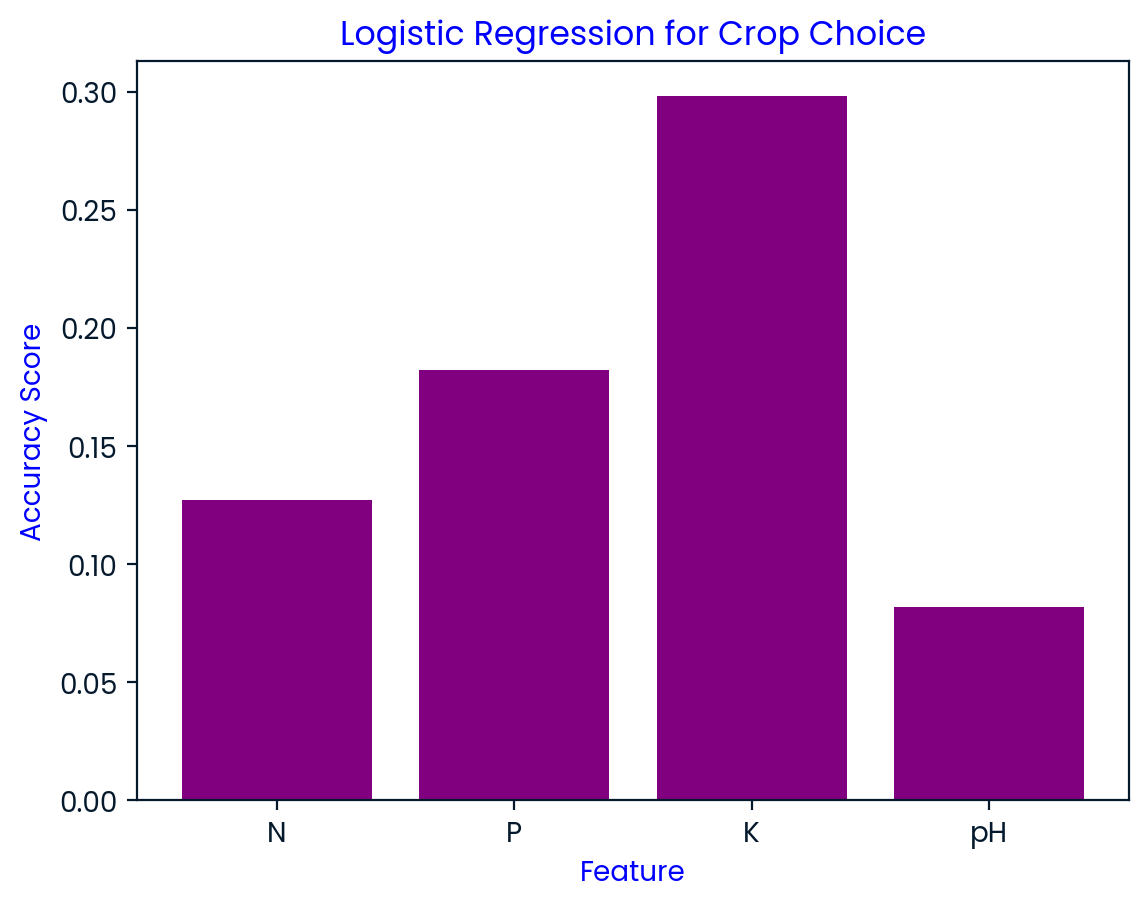

In [11]:
# Store the predictive scores for feature importance
best_predictive_feature_single = { "K": 0.298}
best_predictive_features = {"N": 0.127, "P":0.182, "K": 0.298, "pH":0.082}
print(best_predictive_feature_single)

# Hypothesis should be rejected, instead the single feature important for predictive performance is K levels. 

# Plot feature importance data 
plt.bar(best_predictive_feature.keys(), best_predictive_feature.values(), color = "purple")
plt.xlabel("Feature", color = "blue")
plt.ylabel("Accuracy Score", color = "blue")
plt.title("Logistic Regression for Crop Choice", color = "blue")
plt.show()